# **Necessary Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
tf.random.set_seed(3)
from tensorflow import keras
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Loading the dataset**

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays

print( x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- Training Data = 60000
- Testing Data = 10000
- Image Dimesion = 28 * 28
- Grayscale = 1 channel

## **Displaying Image**

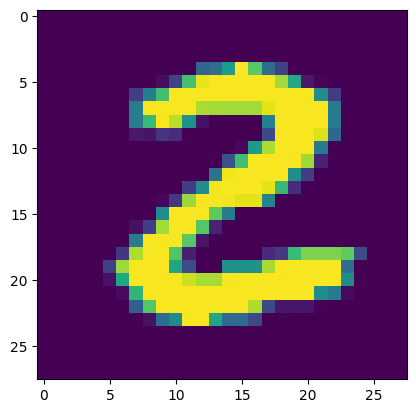

In [ ]:
# train image
plt.imshow(x_train[25])
plt.show()

In [ ]:
 # corresponding Label
print(y_train[25])

2


**Image Labels**

In [ ]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# **Necessary condition (steps)**
- We can use these label directly or we can do OneHotEncoding on these label
- All the images have the same dimensions in this dataset, if not then resize to the common dimension


In [ ]:
  # scaling the values ( after these our data in 0 to 1 scale)
  # min(0/255 = 0 )
  # max(255/255 = 1)

  x_train = x_train/255
  x_test = x_test/255

In [ ]:
# printing the 11 th image

# print(x_train[11])

# **1. Building the Neural Network Model**

In [ ]:
# setting up the layers of the Neural Network

# (28,28,1) == 1 for grayscale [black_&_white]
# (28,28,3) == 3 for RGB (3 channel)

model = Sequential(
    [
      Flatten(input_shape = (28,28),name='Input'), # convert into  1D
      Dense(50,
            activation = 'relu',
            name='fc_1'),
      Dense(50,
            activation = 'relu',
            name='fc_2'),
      Dense(10,
            activation = 'sigmoid',
            name='Output'),
    ])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (Flatten)                      │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

### reason for 'relu' in hidden layers:
#### ReLU (Rectified Linear Unit) is a good default choice for hidden layers in many cases.  It's computationally efficient and helps mitigate the vanishing gradient problem, which can hinder training in deep networks.  The non-linearity introduced by ReLU allows the network to learn complex patterns.

In [ ]:
# compling the model

model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# fit the model

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8497 - loss: 0.5146 - val_accuracy: 0.9477 - val_loss: 0.1769
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9563 - loss: 0.1477 - val_accuracy: 0.9593 - val_loss: 0.1360
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9671 - loss: 0.1079 - val_accuracy: 0.9641 - val_loss: 0.1181
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9744 - loss: 0.0847 - val_accuracy: 0.9664 - val_loss: 0.1079
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9794 - loss: 0.0678 - val_accuracy: 0.9670 - val_loss: 0.1088
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0568 - val_accuracy: 0.9700 - val_loss: 0.1048
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9859 - loss: 0.0479 - val_accuracy: 0.9701 - val_loss: 0.1052
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0424 - 

# **2. training and validation accuracies**

In [ ]:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Testing Accuracy: ",accuracy*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.1503
Testing Accuracy:  97.08999991416931


- **Training_accuracy == 99.08%**
- **Testing_accuracy == 97.08%**

# **Regularization Techniques**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Input, Dropout
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.regularizers import l2

tf.random.set_seed(3)

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255

model = Sequential([
    Flatten(input_shape=(28, 28), name='Input'),
    Dense(50, activation='relu', kernel_regularizer=l2(0.001), name='fc_1'),  # L2 regularization
    Dropout(0.25),  # Dropout layer
    Dense(50, activation='relu', kernel_regularizer=l2(0.001), name='fc_2'),  # L2 regularization
    Dropout(0.25), #Dropout Layer
    Dense(10, activation='sigmoid', name='Output')
])

model.summary()

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Testing Accuracy: ", accuracy * 100)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (Flatten)                      │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_1 (Dense)                         │ (None, 50)                  │          39,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc_2 (Dense)                         │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7491 - loss: 0.9079 - val_accuracy: 0.9392 - val_loss: 0.3162
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9079 - loss: 0.4300 - val_accuracy: 0.9512 - val_loss: 0.2725
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9220 - loss: 0.3697 - val_accuracy: 0.9530 - val_loss: 0.2527
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9291 - loss: 0.3426 - val_accuracy: 0.9583 - val_loss: 0.2385
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9300 - loss: 0.3305 - val_accuracy: 0.9605 - val_loss: 0.2303
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9339 - loss: 0.3186 - val_accuracy: 0.9610 - val_loss: 0.2229
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9351 - loss: 0.3080 - val_accuracy: 0.9642 - val_loss: 0.2153
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9379 - loss: 0.3015 - 



# Original Model (without regularization):
### - Achieved a testing accuracy around 97%.
### - Potential for overfitting:  While the training accuracy might be high, a gap between training and testing accuracy suggests the model might be overfitting to the training data. Overfitting occurs when a model learns the training data too well, including noise and irrelevant details, leading to poor generalization on unseen data (like the test set).


# Regularized Model (with L2 regularization and dropout):
### - L2 regularization (added to the dense layers via `kernel_regularizer=l2(0.001)`) adds a penalty to the loss function based on the magnitude of the weights.  This encourages smaller weights, preventing the model from becoming too complex and thus reducing overfitting.
### - Dropout (added using `Dropout(0.25)`) randomly deactivates a fraction (25% in this case) of neurons during each training iteration.  This forces the network to learn more robust features and prevents reliance on specific neurons, improving generalization.
### - The testing accuracy of the regularized model should be compared to the original model.  If it's similar or better, regularization has helped to improve the model's ability to generalize. If the testing accuracy decreased significantly, the regularization strength (the value 0.001 in `l2(0.001)`) may be too high, and you should experiment with lower values.  Also, check the training accuracy.  If it's also significantly lower, it indicates the regularization is overly restricting the network's learning capacity.


# Key Observations:
### 1.  Overfitting Mitigation: The primary goal of regularization is to reduce overfitting. By comparing the training and testing accuracy of both models, you can assess whether regularization has successfully narrowed the gap, indicating improved generalization.
### 2.  Accuracy Trade-off: Regularization might slightly reduce the training accuracy, but it should improve (or at least not significantly harm) the testing accuracy. This is a common trade-off – a slightly less perfect fit to the training data in exchange for better performance on new, unseen data.
### 3.  Hyperparameter Tuning: The regularization strength (e.g., the value 0.001 in `l2(0.001)`) and the dropout rate are hyperparameters that need tuning.  Experiment with different values to find the optimal settings for your data.


### In summary, regularization techniques like L2 regularization and dropout help to prevent overfitting and improve the generalization capability of neural networks. Comparing the performance metrics (accuracy, training/test gap) of the models with and without these techniques provides a clear indication of their effectiveness.

# Model Optimization and Evaluation

### 1. I will select the Adam because :
###It is a widely used optimizer that combines the benefits of Momentum and RMSprop.
### It adapts the learning rate for each parameter, leading to faster convergence and potentially better performance compared to simpler optimizers like SGD.
### Its adaptive nature makes it suitable for a variety of neural network architectures and datasets, including image classification problems like MNIST.

In [ ]:


# Model Optimization with Adam and SGD

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from keras.datasets import mnist

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the model architecture
def create_model():
  model = Sequential([
      Flatten(input_shape=(28, 28), name='Input'),
      Dense(50, activation='relu', kernel_regularizer=l2(0.001), name='fc_1'),
      Dropout(0.25),
      Dense(50, activation='relu', kernel_regularizer=l2(0.001), name='fc_2'),
      Dropout(0.25),
      Dense(10, activation='sigmoid', name='Output')
  ])
  return model

# Function to compile and train the model
def train_model(model, optimizer):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=0) # Set verbose to 0 to suppress output
    return model


# Create and train models with different optimizers
model_adam = create_model()
model_adam = train_model(model_adam, 'adam')

model_sgd = create_model()
model_sgd = train_model(model_sgd, 'sgd')


# Evaluate the models
loss_adam, accuracy_adam = model_adam.evaluate(x_test, y_test, verbose=0)
loss_sgd, accuracy_sgd = model_sgd.evaluate(x_test, y_test, verbose=0)

print(f"Adam Optimizer - Test Accuracy: {accuracy_adam * 100:.2f}%")
print(f"SGD Optimizer - Test Accuracy: {accuracy_sgd * 100:.2f}%")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Adam Optimizer - Test Accuracy: 96.23%
SGD Optimizer - Test Accuracy: 94.80%


### Adam often converges faster and to better solutions than SGD due to its adaptive learning rates.
### SGD might be preferred when computational resources are very limited or when fine-tuning hyperparameters is critical,
### but often Adam provides superior performance. The results of the two models will be compared for confirmation.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model' is your trained model (the regularized one from the previous code)
y_pred = np.argmax(model.predict(x_test), axis=1)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")






313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy: 0.9624
Precision: 0.9627371062275614
Recall: 0.9624
F1 Score: 0.9624517336466537


- **3.4 confusion matrix**

- **using sklearn confusiondisplay**

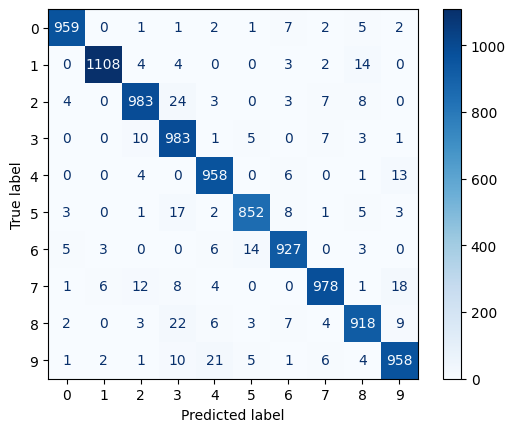

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot(cmap=plt.cm.Blues)
plt.show()


### The confusion matrix visually shows the performance of the classifier.
### - Each row represents the actual class, and each column represents the predicted class.
### - The diagonal elements indicate correctly classified instances for each class.
### - Off-diagonal elements show misclassifications (e.g., how many instances of class 2 were incorrectly classified as class 3).
### - Analyze the misclassifications to understand where the model struggles and identify potential areas for improvement.
### For example, if there's a high number of misclassifications between certain digits, it may indicate that these digits share similar visual features that the model finds difficult to distinguish.

